In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('auto.csv')

In [3]:
data.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [4]:
data.dtypes

mpg       float64
displ     float64
hp          int64
weight      int64
accel     float64
origin     object
size      float64
dtype: object

In [5]:
data['origin'] = data['origin'].astype('category')

In [6]:
data.shape

(392, 7)

In [7]:
data.origin.value_counts()

US        245
Asia       79
Europe     68
Name: origin, dtype: int64

In [8]:
data=pd.concat([data,pd.get_dummies(data.origin,prefix='country')],axis=1)

In [9]:
data.drop('origin',axis=1,inplace=True)

In [10]:
data

,mpg,displ,hp,weight,accel,size,country_Asia,country_Europe,country_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0
...,...,...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,15.0,0,0,1
388,27.0,151.0,90,2950,17.3,10.0,0,0,1
389,29.5,98.0,68,2135,16.6,10.0,1,0,0
390,17.5,250.0,110,3520,16.4,15.0,0,0,1


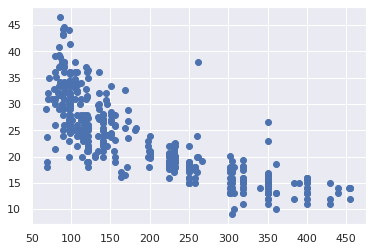

In [11]:
plt.scatter(data.displ,data.mpg)

## DecisionTreeRegressor

In [12]:
X=data.drop('mpg',axis=1)
y=data['mpg']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)

### Evaluating the regression tree
We will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).


In [15]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE,accuracy_score,confusion_matrix

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.82


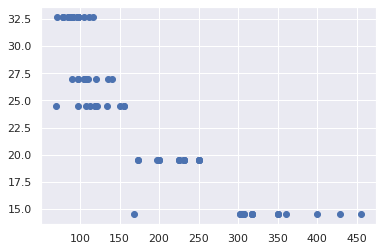

In [16]:
plt.scatter(X_test.displ,y_pred)

In [17]:
X_test.displ

78     198.0
274    200.0
246    307.0
55     105.0
387    250.0
       ...  
361     97.0
82     141.0
114    107.0
3      250.0
18      71.0
Name: displ, Length: 79, dtype: float64

In [18]:
dt.score(X_train, y_train)

0.7522551987799679

In [19]:
dt.score(X_test, y_test)

0.627629951225576

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)
# Computing y_pred
y_pred_lr = model.predict(X_test)

# Compute mse_dt
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_dt
rmse_lr = mse_lr ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_lr))

Test set RMSE of dt: 4.30
